### Video Loading Tests

This file is for testing my methods for loading in the video data and manipulating it so that is ready for analysis/training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120
import cv2 # OpenCV
import os

from toolbox import Settings, Preprocessing, Sampling, VideoAnalysis

In [2]:
Preprocessing.testData()

Searching for data in location specified by Settings.DATA_LOCATION:
/run/media/jack/Seagate Portable Drive/Research/geogran2/
...
Found 54 possible data files using listDataFiles()
Verified 54 properties files exist
Example of property file keys:
dict_keys(['name', 'velocity', 'shearspringname', 'normalspringname', 'numpart', 'boundary', 'starttime', 'goodtime', 'endtime'])

Verified 54 mat files exist
Example of mat file keys:
dict_keys(['t', 'x', 'f', 'fn', 'good', 'multipeak', 'time', 'position', 'force', 'duration', 'slip', 'deltaF', 'work'])

Found 25 data files with movies using listDataFiles(True)
Verified 25 movies exist


True

In [2]:
dataFiles = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)
#matFile = Preprocessing.loadMatFile(dataFiles[0])
#video = Preprocessing.loadVideo([dataFiles[0], dataFiles[7], dataFiles[18]], ignoreInvalidData=True)

propertyFiles = Preprocessing.loadRunData(dataFiles)
videos = Preprocessing.loadVideo(dataFiles)
matFiles = Preprocessing.loadMatFile(dataFiles)

In [12]:
print(propertyFiles[0])
print(len(matFiles[0]["good"]))

v = videos[0]

ret, frame = v.read()

print(np.mean(frame[:,:,0]))


{'name': '070330b', 'velocity': 0.05, 'shearspringname': 'D', 'normalspringname': '#1', 'boundary': '', 'starttime': 15.0, 'endtime': 650.0, 'fps': 4.0, 'pixpermm': 1.8, 'type': "{'creep'}", 'goodarea': array([ 90, 697,  79, 493]), 'centerline': 270.0, 'numpart': 'N'}
451
51.246403827751195


In [11]:
i = 0
print(propertyFiles[i])
Sampling.playVideo(videos[i], propertyFiles[i])

{'name': '070330b', 'velocity': 0.05, 'shearspringname': 'D', 'normalspringname': '#1', 'boundary': '', 'starttime': 15.0, 'endtime': 650.0, 'fps': 4.0, 'pixpermm': 1.8, 'type': "{'creep'}", 'goodarea': array([ 90, 697,  79, 493]), 'centerline': 270.0, 'numpart': 'N'}


345.0

In [8]:
#print(matFiles[i])

2847.891456

070330b


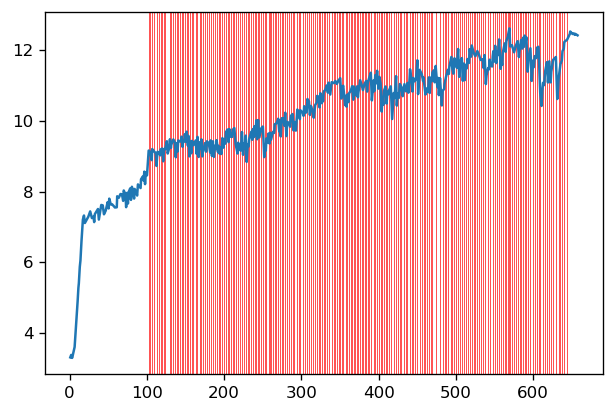

In [13]:
print(dataFiles[0])
peakTimes = [matFiles[0]["time"][i] for i in range(len(matFiles[0]["time"])) if bool(matFiles[0]["good"][i])]
slipTimes = [matFiles[0]["time"][i] for i in range(len(matFiles[0]["time"])) if not bool(matFiles[0]["good"][i])]
for p in peakTimes:
    plt.axvline(p, color='r', alpha=.8, linewidth=.5)
#for s in slipTimes:
#    plt.axvline(s, color='g', alpha=.8, linewidth=.5)
    
#plt.plot(matFiles[0]["t"], matFiles[0]["f"])
plt.plot(matFiles[0]["time"], matFiles[0]["force"])

plt.show()

In [3]:
gSqr = VideoAnalysis.averageGSquared(videos[0], propertyFiles[0])
print(gSqr)

[34.56952279 34.50617046 34.48314762 34.38401917 34.48099219 34.47588607
 34.57733535 34.46359228 34.49671157 34.69204142 35.45608812 35.73908318
 35.792637   36.07778812 36.14005695 36.25916964 36.56666251 36.85964199
 36.94849218 37.1257077  37.26871583 37.31065197 37.1408956  37.15817339
 37.31194277 37.59076176 37.81837674 37.87271511 38.01419206 38.22242194
 38.68049997 39.21457431 38.85718549 38.5150235  38.52082625 38.68091842
 38.88750296 39.22768561 39.35600164 39.71070253 39.87775893 39.8415493
 40.13696836 40.16352386 40.1812543  39.72166661 40.1621189  40.55263149
 40.72310713 40.57291256 40.5743312  40.60237659 40.44580724 41.06702053
 39.58051969 39.86581183 39.34673276 39.95372016 40.10514223 39.97229472
 40.16414153 40.34057387 40.56608352 41.10324408 41.43253403 40.40825061
 40.36227569 40.38142029 40.31551447 40.56852671 40.68957572 40.92828907
 41.74495942 39.97882183 40.30680693 40.35283384 40.71652058 40.88072241
 41.5567506  40.50046869 40.80006357 40.71721982 41.